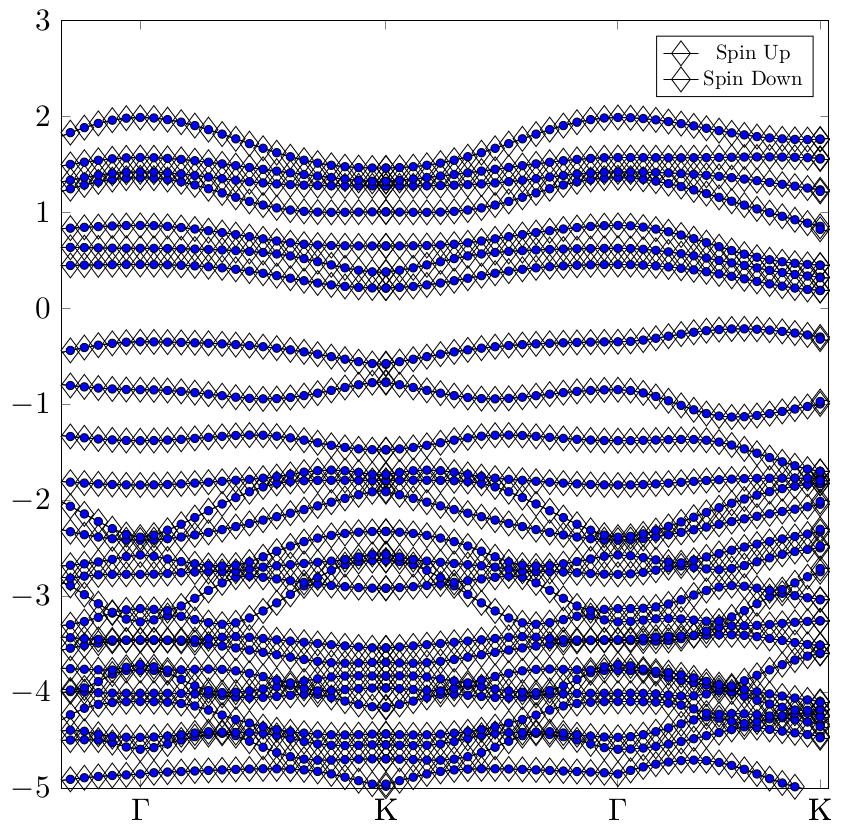

In [142]:
using PGFPlotsX
using JSON
using PyCall
np = pyimport("numpy")

bands = read("json/bands_PtS2_vacPt_magnetic_-0.02.json",String)
data = JSON.parse(bands)
bands = np.array(data["energies"])

@pgf TikzPicture(
Axis(
{"scale only axis",
height = "13cm",
width = "13cm",
xmin=1,xmax=2.6,
ymin=-5,ymax=3,
xtick = data["label_xcoords"],
xticklabels =data["x_labels"],
"every tick label/.append style={scale=1.5}",
# "legend entries={Spin Up,Spin Down}"
},
[Plot({mark="diamond",mark_options={fill=" ",scale=3}},Table("x"=>bands[1,:,1],"y"=>bands[1,:,k])) for k=30:55],
[Plot({mark="*",mark_options={fill="blue",}},Table("x"=>bands[2,:,1],"y"=>bands[2,:,k])) for k=30:55],
[Legend(["Spin Up","Spin Down"])],
)
)